In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
import numpy as np
import torch

# Creating tensors

## From NumPy arrays

In [ ]:
np_a = np.random.randn(2, 3)
torch_a = torch.from_numpy(np_a) #convert numpy array to tensor

In [ ]:
print("NumPy array:")
print(np_a, "\n")
print("PyTorch tensor:")
print(torch_a, "\n")

print(f"NumPy array dtype: {np_a.dtype}")
print(f"PyTorch tensor dtype: {torch_a.dtype}")
print(f"Default PyTorch float: {torch.get_default_dtype()}", "\n")

print(f"Tensor shape: {torch_a.shape}")
print(f"Tensor shape: {torch_a.size()}") #size is the more Torch way to write shape, unlike in numpy
print(f"Tensor number of dimensions: {torch_a.dim()}")

Note, that PyTorch reused dtype from the NumPy array. However, `float64` is not the default floating point type for PyTorch: In Deep learning, we dont need the same kind of precision that is required in other sciences. Sometimes we even prefer the noise created by non-exact numbers

Create a Tensor

In [ ]:
torch_a = torch.tensor(np_a, dtype=torch.float) #Use default datatype, not datatype passed from np, which is float64

In [ ]:
torch_a.dtype

In [ ]:
print("NumPy array:")
print(np_a, "\n")
print("PyTorch tensor:")
print(torch_a, "\n")

The values printed were the same as with the numpy one, except...

PyTorch numerical types **are not real Python types**:

In [ ]:
print(type(np.float32), type(torch.float))
#np is a real python type, whereas torch is not a python type, rather some sort of structure from class torch

## Predefined structure and values

We can create all the common tensor pattern with PyTorch:

In [ ]:
torch.arange(10)

In [ ]:
torch.zeros(2, 3)

In [ ]:
torch.linspace(0, 10, 11)

In [ ]:
torch.zeros(2, 5, dtype=torch.bool)

In [ ]:
torch.ones(2, 5, dtype=torch.bool)

## Random numbers

Random numbers, however, are created differently in PyTorch:

In [12]:
torch.manual_seed(8436) #This is important with model training, as we need to try and reproduce our models to train them and check them.
a = torch.Tensor(1000) #one tensor with 1000 elements

`a` contains whatever garbage was in memory:

In [15]:
a 
a.dim()

1

In-place filling of `a` with Gaussian random variable:

In [9]:
a.normal_(0, 2.) #This will fill our array with a normal distribution

plt.hist(a);

Error in callback <function flush_figures at 0x000001C4B52259D8> (for post_execute):


KeyboardInterrupt: 

Or a uniform disribution:

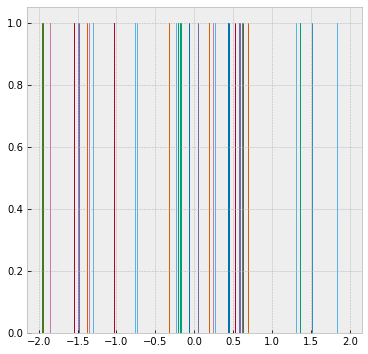

In [8]:
a.uniform_(-2, 2.)

plt.hist(a);

### Using distributions

Other distributions are available via `torch.distributions`:

In [ ]:
poisson_sampler = torch.distributions.Poisson(1)

In [ ]:
samples = poisson_sampler.sample((500,)) #1-D sample, with 500 elements.

In [ ]:
plt.hist(samples, range=(0, 10), bins=10);

# Tensor operations

There are two types of operations in PyTorch: in-place and those, which create a new tensor. In-place operations have `_` in their name as a convention:

In [ ]:
a = torch.Tensor(2, 3)
a.normal_()

Operations, which create new arrays do not:

In [ ]:
# New tensor
print(a.exp())
print(a)

In [ ]:
# Inplace version
print(a.exp_())
print(a)

In [ ]:
b = torch.ones(2, 1)
b

Arithmetics also have two definitions:

In [ ]:
# New tensor
a + b

In [ ]:
a

In [ ]:
# In-place
a.add_(b)

In [ ]:
a

We can chain both in-place and out-of-place operations, as they all conveniently return a tensor they modified/created:

In [ ]:
b.normal_() is b

In [ ]:
a.exp().div(b)

In [ ]:
a.exp_().div_(b)

In [ ]:
a

Boolean operations are vectorized as well:

In [ ]:
a > 10

In [ ]:
a.gt(10)

However:

In [ ]:
a.gt_(10)

# To Python and NumPy

In [ ]:
# Shape the same data with PyTorch tensor
a.numpy()

However, for tensors, which are used in gradient computations, we also need to detach them (to be discussed later).

Note, that indexing of single scalar value works differently to NumPy:

In [ ]:
a[0, 1]  # this is a scalar, i.e. a 0D tensor. The result is not a value, rather a tensor.

To get the value itself:

In [ ]:
a[0, 1].item() #This, however, will create a new object in memory, consisting of just the value.

# Reshape and resize

In [ ]:
a = torch.randn(3, 8)
a

In [ ]:
a.view(4, -1)

Views (both direct and coming from indexing) work in a similar fashion to NumPy:

In [ ]:
a[::2, ::2]

In [ ]:
b = a[::2, ::2]
b[0] = 7

In [ ]:
a

In [ ]:
b

In [ ]:
a[::2, ::2].view(2,2,2)

In [ ]:
print("Original:")
print(a, "\n")
print("Sliced:")
print(a[::2, ::2])

In [ ]:
a.dtype

In [ ]:
a[::2, ::2].stride(), a.stride()

In [ ]:
a[::2, ::2].view(2, 2, 2)

In [ ]:
a[::2, ::2].reshape(4, 2)

In [ ]:
a.storage()

To get underlying storage:

In [ ]:
a[::2, ::2].reshape(2, 2, 2).storage().data_ptr()

In [ ]:
a.view(4, 6).storage().data_ptr()==a.storage().data_ptr()